In [1]:
import sys
sys.path.insert(0, './src/yelp_prediction')

In [13]:
import polars as pl
import dataframes as df
import matplotlib.pyplot as plt

In [ ]:
(df_businesses, df_reviews, df_photos, df_features) = pl.collect_all(
    (
        df.q_businesses,
        df.q_reviews,
        df.q_photos,
        df.q_features,
    )
)

In [ ]:
def run(f):
    """Simple function that can be used as @decorator so that we don't pollute scopes"""
    return f()

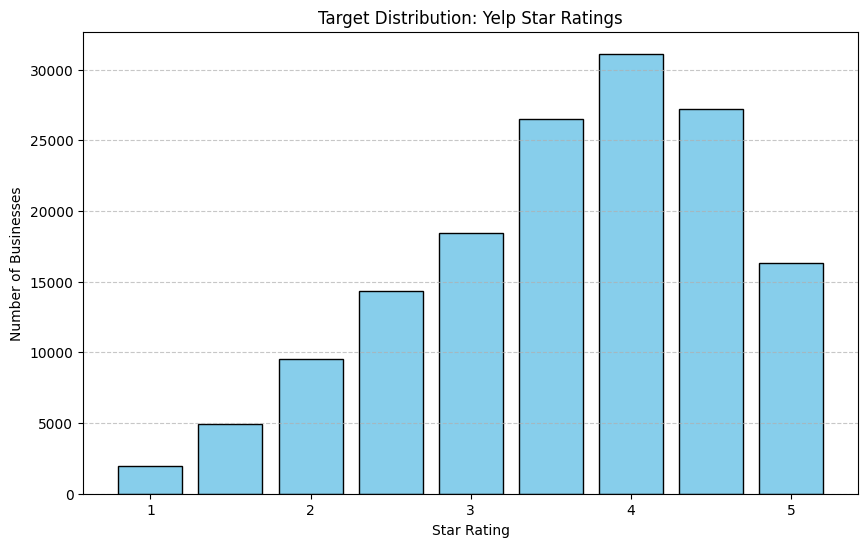

In [46]:
@run
def _show_stars_dist():
    stars_dist = df_businesses.group_by("stars").len().sort("stars")
    x = stars_dist["stars"].to_list()
    y = stars_dist["len"].to_list()

    plt.figure(figsize=(10, 6))
    # Width=0.4 because steps are 0.5 (prevents bars from touching)
    plt.bar(x, y, width=0.4, color="skyblue", edgecolor="black")
    plt.title("Target Distribution: Yelp Star Ratings")
    plt.xlabel("Star Rating")
    plt.ylabel("Number of Businesses")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
